In [1]:
import numpy as np
import matplotlib.pyplot as plt

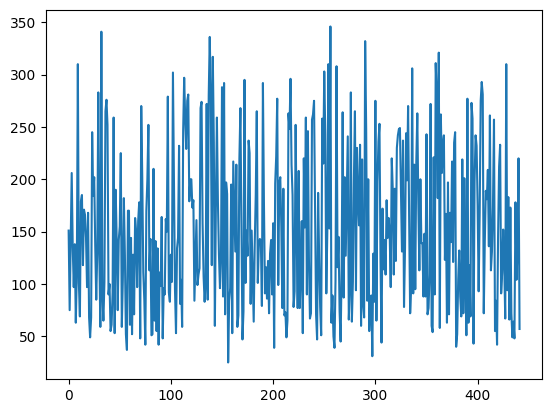

In [17]:
import pandas as pd
from sklearn.datasets import load_diabetes

data = load_diabetes()
X,y = data['data'], data['target']

plt.plot(np.arange(y.shape[0]), y)
plt.show()

In [2]:
# Create a function that returns left and right indicators
